# Homework 7

- Youjun Chen
- December 2th, 2020

## Problem 0

It is highly recommended that you work with your group to fully complete the Discussion assignments on 11/17, 11/19, and 11/24, as these will directly help with your project. 

## Problem 1

In your project, you are required to demonstrate the use of decision trees and multinomial logistic regression classifiers. Groups of three must also demonstrate the use of one additional model. In this homework assignment, you will write a detailed report that will largely fulfill this requirement. 

Choose one machine learning model, other than decision trees and multinomial logistic regression (unless you are a group of 2 -- see below). Some possibilities include, but are not limited to: 

- Support vector classifiers (`sklearn.svm.SVC`). Complexity parameter is called `gamma`. Higher values create more complex models)
- K-nearest-neighbor classifiers (`sklearn.neighbors.KNeighborsClassifier`). Complexity parameter is called `n_neighbors`. Higher values create less complex models. When working with KNN models, it is helpful to standardize your data columns first. For this purpose, `sklearn.preprocessing.StandardScaler` can be used. 
- Multilayer perceptron classifier, a kind of neural network (`sklearn.neural_network.MLPClassifier`). The complexity is controlled by the number of neurons and layers, as specified by the `hidden_layer_sizes` parameter -- more neurons and layers correspond to more complex models. 

You should consult the documentation for these models, which is available online or via `?`. 

**Suggestion**: It is recommended, but not required, that you coordinate with your group members so that each of you explores a different model. It is similarly suggested, but not required, that each of you use different subsets of three columns so that you can each learn something about different parts of the data. You are encouraged to help each other out on all parts of this problem. 

#### Groups of 2

If you are a group of 2, you are not required to use an additional model and may instead use multinomial logistic regression for this assignment. Please note this in your submission. 

- Multinomial logistic regression (`sklearn.linear_model.LogisticRegression`). The complexity is controlled by `C`, the inverse regularization strength. Larger values of `C` correspond to more complex models. If you demonstrate multinomial logistic regression for this problem, you should also demonstrate cross-validation to select a small feature set. That is, you should (a) skip step 2 below and (b) use CV to select a set of three features, including one qualitative feature and two quantitative ones. 

### Instructions

Replicate and expand the pipeline from Discussion 15, substituting out decision trees for your chosen classifier. You may also choose a different set of three columns than the ones used in that Discussion activity. In particular, you should: 

1. **Load** the data. 
2. **Select no more than three predictor columns** of the data and the `Species` target column, discarding the others. Choose one qualitative predictor column (e.g. `Island`, `Sex`) and two quantitative predictor columns. 
2. **Split the data** into training and test sets. 
3. Write one or more functions to **clean and transform the data** as needed. You should add comments and function docstrings as appropriate to describe to your reader what you are doing and why. Apply your functions to the training and test sets. 
4. **Use cross-validation** to estimate an optimal complexity parameter for your model. 
5. Having selected an optimal complexity parameter, **evaluate your model on the test set.** 
6. **Inspect** a few instances in which your trained model gave the wrong answer on the test set. Explain why your model was "tricked" in this case? Create and comment on a confusion matrix -- [check Monday's lecture notes](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/content/ML/digits.ipynb) for an example. 
7. **Plot the [decision regions](https://nbviewer.jupyter.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/live-lecture-22.ipynb)** for your model. The horizontal and vertical axes should be the two quantitative predictor variables that you selected. Create a separate plot for each possible value of the qualitative predictor variable that you selected. For example, if you chose `Sex` as your qualitative variable, you should show two plots, with the decision regions for Female and Male penguins separately. Add appropriate axis labels and any other measures required to make your plots look professional. Add commentary to contextualize the mistakes that your model made. 

Throughout, add helpful explanation for your reader. For example, you should explain the idea behind cross-validation; anything you are able to learn about how your model works; how to interpret the optimal complexity parameter; and why your model went wrong in certain cases.  

### Specifications

Your solution should **not** fit in a single code cell -- a good, readable, and adequately-explained solution will likely require at least one code cell for each of the eight steps above. Make sure that there is plenty of surrounding text explanation and comments. Add code cells and plenty of markdown cells as needed. You can also use section headers with `###` to organize your work. **Treat this problem as 50% coding assignment and 50% clearly-written lab report.**

Your comments and explanation should be written to an imaginary reader who has never encountered the Palmer Penguins data set before, and knows less about machine learning than you do. Explain your steps. Why train-test split? Why cross-validation? Why decision regions? And so on. If you'd like, imagine that you are writing to a time-traveller version of you from two weeks ago. 

## Your Solution

In [1]:
# Import required libraries
import urllib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
# Downloading the penguins dataset
url = 'https://philchodrow.github.io/PIC16A/content/IO_and_modules/IO/palmer_penguins.csv'
filedata = urllib.request.urlopen(url)
with open('penguins.csv', 'wb') as f:
    f.write(filedata.read())

In [3]:
# load the data
penguins = pd.read_csv('penguins.csv')

In [4]:
penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

### Data cleaning and preparation

In [5]:
# select columns
# qualitative predictor column: 'Sex'
# quantitative predictor columns: "Flipper Length (mm)", "Body Mass (g)"
cols = ["Species","Island", "Culmen Length (mm)", "Culmen Depth (mm)"]

# drop rows with NaN values in columns of "Island", "Culmen Length (mm)", "Culmen Depth (mm)"
penguins = penguins.dropna(subset = cols[1:])

In [6]:
# Split the data into training and test sets
train, test = train_test_split(penguins, test_size = 0.2) # hold out 20% of the data

X_train = train[cols[1:]]
y_train = train[["Species"]]

X_test = test[cols[1:]]
y_test = test[["Species"]]

In [7]:
def clean_data(X, y):
    '''
    This function encodes "Sex" and "Species" as integers
    '''
    X = X.copy()
    y = y.copy()
    
    # encode the sex and the species of the penguins as integers
    le = preprocessing.LabelEncoder()
    X['Island'] = le.fit_transform(X['Island'])
    y['Species'] = le.fit_transform(y['Species'])
    
    return (X, y, X.columns.tolist())

In [8]:
# clean the data
X_train, y_train, labels = clean_data(X_train, y_train)
X_test, y_test, labels = clean_data(X_test, y_test)

In [10]:
species_names = ['Adelie', 'Chinstrap', 'Gentoo'] # check how the species are encoded

### Model training and Cross-validation
- Chosen model: Multilayer perceptron

#### 1. Use hyperparameter and cross-validation method to find optimal complexity parameter

In [11]:
# Generate all combinations of hidden layer sizes
import itertools 
a = [[10,50,100,500],[10,50,100,500],[10,50,100,500],[10,50,100,500]]
hidden_layers_sizes = list(itertools.product(*a))

In [12]:
# find the best size of hidden layer
from sklearn.neural_network import MLPClassifier
best_score = 0

# make a model
for sizes in hidden_layers_sizes:

    nn = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5, 
                    hidden_layer_sizes= sizes, 
                    max_iter = 400,
                    random_state=0)
    # 10-fold cross validation: hold out 10%, train on the 90%, repeat 10 times. 
    cv_score = cross_val_score(nn, X_train, y_train['Species'], cv=10).mean()
    if cv_score > best_score:
        best_layer_size = sizes
        best_score = cv_score

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/chenyoujun/opt/anaconda3/envs/myNewEnv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perce

In [13]:
print(best_layer_size, best_score) #best model

(50, 10, 50, 10) 0.9927248677248677


In [14]:
# check the model on the testing data
nn = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5, 
                    hidden_layer_sizes= best_layer_size ,
                    max_iter = 400,
                    random_state=0)
nn.fit(X_train, np.ravel(y_train))
nn.score(X_test, y_test)

0.9710144927536232

#### Notes about feature selection
When I chose "Flipper Length (mm)", "Body Mass (g)", "Sex" as my predictor data, I could only get an around 70% score in training data and around 65% for testing. I think this is because "Flipper Length (mm)", "Body Mass (g)", "Sex" are not good determinants for species.

### Inspect the result

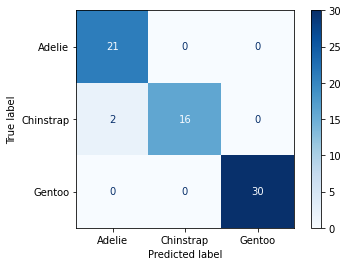

In [15]:
# get the confusion matrix
from sklearn.metrics import confusion_matrix
y_test_pred = nn.predict(X_test)
c = confusion_matrix(y_test, y_test_pred)

# display the confusion matrix in heatmap format
from sklearn.metrics import plot_confusion_matrix
confusion_matrix_graph = plot_confusion_matrix(nn,X_test, y_test, 
                                               display_labels =species_names,
                                               cmap=plt.cm.Blues)

Possible reason of the error: There are not enough sampls of Chinstrap Penguins so the model can't 'learn' how to classify it well.

### Plot the decision region

In [16]:
def plot_regions(c, X, y , island_code, ax ):
    """
    Plots the decision regions from a classifer 
    underneath the data in X and y. 
    c: a classifier
    X: predictor variables
    y: array, target variables
    island_code: integer, since we encoded it
    ax: AxesSubplot
    """
    island = {0:'Biscore', 1:'Dream', 2:'Torgersen'} 

    
    # prepare predictor and target data on one island
    y = y[X['Island'] == island_code ]['Species']
    X = X[X['Island'] == island_code ].drop(columns = ['Island']).copy()
    
    
    # fit the model to the data
    c.fit(X, y)
    
    # for convenience, give names to the two 
    # columns of the data
    x0 = X['Culmen Length (mm)']
    x1 = X['Culmen Depth (mm)']
    
    # create a grid
    grid_x = np.linspace(x0.min(), x0.max(), 501)
    grid_y = np.linspace(x1.min(), x1.max(), 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # extract model predictions, using the 
    # np.c_ attribute to join together the 
    # two parts of the grid. 
    # array.ravel() converts an multidimensional
    # array into a 1d array, and we use array.reshape()
    # to turn the resulting predictions p 
    # back into 2d

    p = c.predict(np.c_[xx.ravel(), yy.ravel()])
    p = p.reshape(xx.shape)
    
   
    
    # use contour plot to visualize the predictions
    ax[island_code].contourf(xx, yy, p, cmap = "jet", alpha = 0.2)
    
    # plot the data    
    ax[island_code].scatter(x0, x1, c = y, cmap = "jet")

    
    ax[island_code].set(xlabel = "Culmen Length (mm)",
           ylabel = "Culmen Depth (mm)",
           title = island[island_code ])

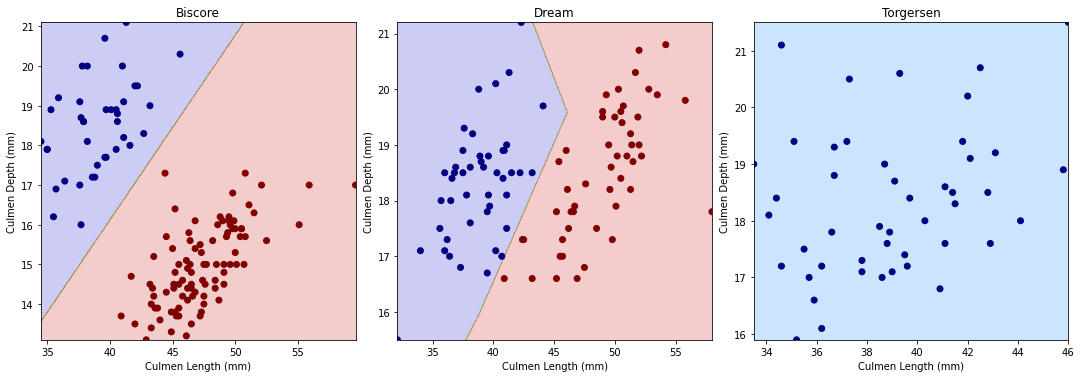

In [17]:
# create the plot
fig, ax = plt.subplots(1,3,figsize = (15, 5))
plt.tight_layout()


plot_regions(nn,X_train, y_train, 0, ax)
plot_regions(nn,X_train, y_train, 1, ax)
plot_regions(nn,X_train, y_train, 2, ax)